In [19]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda 
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import mse
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [20]:
(xTrain, yTrain), (xVal, yVal) = mnist.load_data()
xTrain, xVal = xTrain.reshape(60000,784)/255., xVal.reshape(10000,784)/255.

In [44]:
def sampling(args): # z=z_mean+sqrt(var)*epsilon # args(tensor): mean & log of variance of Q(z|X)
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]   # tensor
    dim = K.int_shape(z_mean)[1] # 2
    epsilon = K.random_normal(shape=(batch, dim), mean=0, stddev=1)
    return z_mean + epsilon * K.exp(0.5*z_log_var)

inputL = Input(shape=(784,))
x = Dense(512, activation='relu')(inputL)
z_mean = Dense(2, name='z_mean')(x)
z_log_var = Dense(2, name='z_log_var')(x)
z = Lambda(sampling, output_shape=(2,), name='z')([z_mean, z_log_var])
encoder = Model(inputL, [z_mean, z_log_var, z], name='Encoder')
encoder.summary(); print("\n\n")

dInputL = Input(shape=(2,))
x = Dense(512, activation='relu')(dInputL)
outputL = Dense(784, activation='sigmoid')(x)
decoder = Model(dInputL, outputL, name='Decoder')
decoder.summary(); print("\n\n")

outputL = decoder(z) # decoder model connect to z. View whole decoder as a layer called outputL
vae = Model(inputL, outputL, name="VAE")
vae.summary()

reconstruction_loss = 784*mse(inputL, outputL)
kl_loss = -0.5*K.sum( 1+z_log_var-K.square(z_mean)-K.exp(z_log_var), axis=-1)
vae.add_loss( K.mean(reconstruction_loss+kl_loss) )
vae.compile(optimizer=Adam(lr=0.0001))

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_58 (Dense)                (None, 512)          401920      input_39[0][0]                   
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_58[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_58[0][0]                   
____________________________________________________________________________________________

In [45]:
history = vae.fit(xTrain, None, epochs=200, batch_size=128, validation_data=(xVal, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 6s 101us/step - loss: 85.3411 - val_loss: 59.3225
Epoch 2/200
60000/60000 [==============================] - 6s 93us/step - loss: 55.3139 - val_loss: 53.0482
Epoch 3/200
60000/60000 [==============================] - 5s 90us/step - loss: 51.6345 - val_loss: 50.3395
Epoch 4/200
60000/60000 [==============================] - 6s 96us/step - loss: 49.2529 - val_loss: 48.4466
Epoch 5/200
60000/60000 [==============================] - 7s 109us/step - loss: 47.8546 - val_loss: 47.1503
Epoch 6/200
60000/60000 [==============================] - 7s 115us/step - loss: 46.6048 - val_loss: 45.8358
Epoch 7/200
60000/60000 [==============================] - 7s 113us/step - loss: 45.5211 - val_loss: 44.9040
Epoch 8/200
60000/60000 [==============================] - 7s 114us/step - loss: 44.8220 - val_loss: 44.3592
Epoch 9/200
60000/60000 [==============================] - 7s 118us/step - loss: 

60000/60000 [==============================] - 8s 133us/step - loss: 38.9071 - val_loss: 39.2077
Epoch 76/200
60000/60000 [==============================] - 8s 134us/step - loss: 38.8524 - val_loss: 39.2076
Epoch 77/200
60000/60000 [==============================] - 8s 132us/step - loss: 38.8264 - val_loss: 39.0655
Epoch 78/200
60000/60000 [==============================] - 8s 134us/step - loss: 38.7987 - val_loss: 39.1036
Epoch 79/200
60000/60000 [==============================] - 8s 133us/step - loss: 38.7541 - val_loss: 39.0821
Epoch 80/200
60000/60000 [==============================] - 8s 133us/step - loss: 38.7239 - val_loss: 39.0605
Epoch 81/200
60000/60000 [==============================] - 8s 136us/step - loss: 38.6985 - val_loss: 39.0104
Epoch 82/200
60000/60000 [==============================] - 8s 133us/step - loss: 38.6729 - val_loss: 38.9978
Epoch 83/200
60000/60000 [==============================] - 8s 131us/step - loss: 38.6352 - val_loss: 38.9525
Epoch 84/200
60000/6000

60000/60000 [==============================] - 7s 122us/step - loss: 37.3918 - val_loss: 38.2411
Epoch 150/200
60000/60000 [==============================] - 7s 122us/step - loss: 37.3864 - val_loss: 38.2381
Epoch 151/200
60000/60000 [==============================] - 7s 124us/step - loss: 37.3703 - val_loss: 38.2482
Epoch 152/200
60000/60000 [==============================] - 7s 122us/step - loss: 37.3626 - val_loss: 38.2844
Epoch 153/200
60000/60000 [==============================] - 8s 130us/step - loss: 37.3575 - val_loss: 38.2465
Epoch 154/200
60000/60000 [==============================] - 8s 133us/step - loss: 37.3381 - val_loss: 38.2408
Epoch 155/200
60000/60000 [==============================] - 7s 121us/step - loss: 37.3251 - val_loss: 38.2331
Epoch 156/200
60000/60000 [==============================] - 7s 119us/step - loss: 37.3106 - val_loss: 38.2234
Epoch 157/200
60000/60000 [==============================] - 8s 126us/step - loss: 37.2941 - val_loss: 38.1959
Epoch 158/200
6

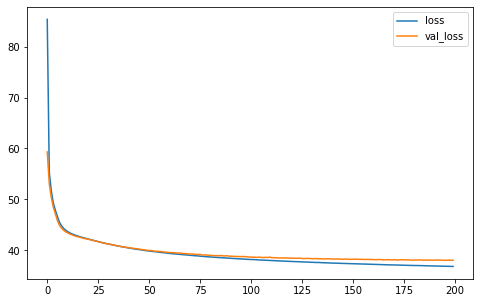

In [46]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.show()

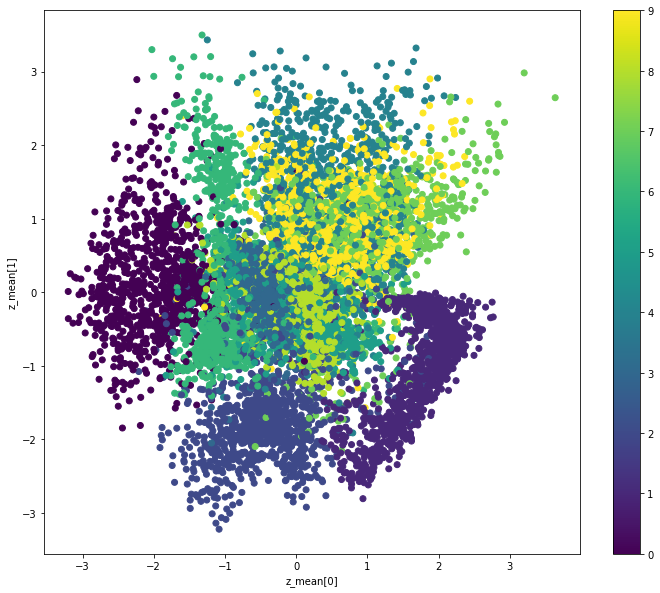

In [64]:
z_mean, _, _ = encoder.predict(xVal) # 10000, 2
plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1], c=yVal)
plt.colorbar()
plt.xlabel("z_mean[0]")
plt.ylabel("z_mean[1]")
plt.show()

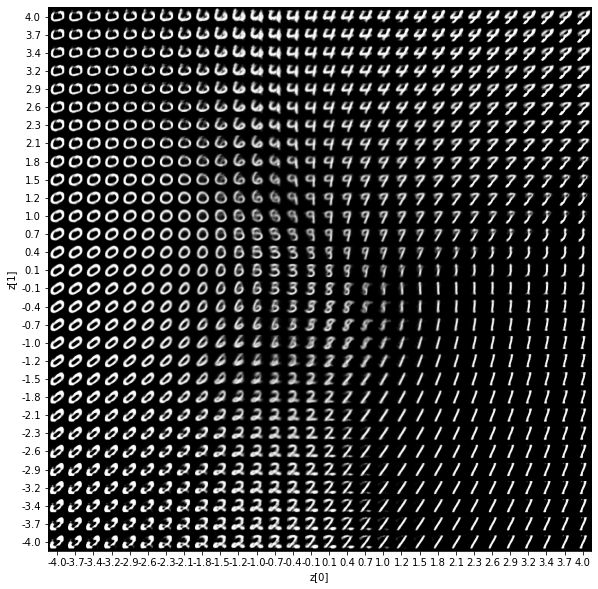

In [80]:
F = np.zeros((28*30, 28*30)) # 30*30 numbers from -4 to 4 # each picture size 28*28
grid_x = np.linspace(-4, 4, 30)
grid_y = np.linspace(-4, 4, 30)[::-1]

for i, yi in enumerate(grid_y): # row major fill in
    for j, xi in enumerate(grid_x):
        x_decoded = decoder.predict( np.array([[xi, yi]]) )
        F[i*28:(i+1)*28, j*28:(j+1)*28] = x_decoded[0].reshape(28,28)

plt.figure(figsize=(10, 10))
plt.xticks(np.arange(14,14+30*28,28), np.round(grid_x, 1))
plt.yticks(np.arange(14,14+30*28,28), np.round(grid_y, 1))
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.imshow(F, cmap='Greys_r')
plt.show()